<a href="https://colab.research.google.com/github/ShreyasShimpi/Data-Sructures/blob/master/google_stocks_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import datetime

importing database

In [3]:
df = pd.read_csv("/content/Google_Stock_Price_Train.csv", index_col="Date", parse_dates=True)

In [6]:
df.head()
# df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [10]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [11]:
df.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


Plotting graph


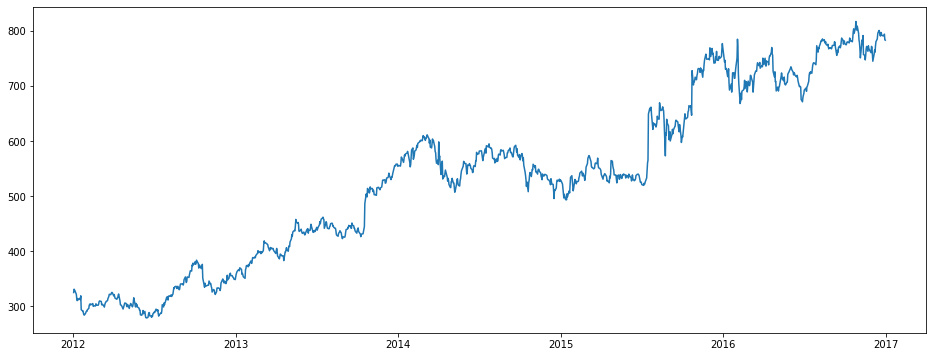

In [17]:
plt.figure(figsize=[16,6])
x = df["Open"]
plt.plot(x)

Homogenize the datset

In [18]:
df["Close"] = df["Close"].str.replace(',', '').astype(float)
df["Volume"] = df["Volume"].str.replace(',', '').astype(float)

In [19]:
df.describe()

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,533.709833,537.880223,529.007409,712.669666,3.158107e+06
std,151.904442,153.008811,150.552807,164.752591,2.273726e+06
min,279.120000,281.210000,277.220000,491.200000,7.900000e+03
25%,404.115000,406.765000,401.765000,576.740000,1.621700e+06
50%,537.470000,540.750000,532.990000,695.675000,2.566150e+06
75%,654.922500,662.587500,644.800000,782.105000,4.122500e+06
max,816.680000,816.680000,805.140000,1216.830000,2.497790e+07


7 days rolling mean

In [25]:
df.rolling().mean().head(15)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


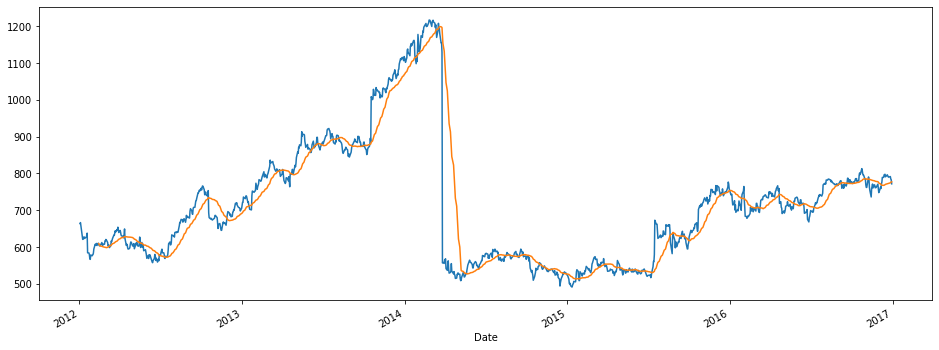

In [40]:
df["Close"].plot(figsize=(16,6))
# 30 days rollling mean
df.rolling(30).mean()["Close"].plot()

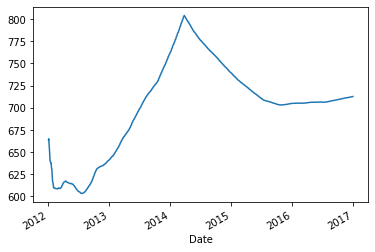

In [36]:
df["Close"].expanding(min_periods=1).mean().plot() 

## Traning Dataset

In [41]:
train = df["Open"]
train = pd.DataFrame(train)

Data Preprocessing

In [49]:
# Feature Scaling of data using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range = (0,1))
train_scale = scale.fit_transform(train)

In [65]:
x_train = []
y_train = []
for i in range(60, 1258):
  x_train.append(train_scale[i-60:i,0])
  y_train.append(train_scale[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

# # Reshaping x_train
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [68]:
x_train.shape

(1198, 60, 1)

Feature Extraction

In [69]:
# importing keras libs
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [71]:
# Initialize RNN
regressor = Sequential()

## Training Neural Network

In [72]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

In [74]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 4s 110ms/step - loss: 0.0444
Epoch 2/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0059
Epoch 3/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0048
Epoch 4/100
38/38 [==============================] - 4s 116ms/step - loss: 0.0053
Epoch 5/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0051
Epoch 6/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 115ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 4s 113ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0045
Epoch 12/100
38/38 [==============================] - 4s 111ms/step - loss: 0.0043
Epoch 13/100


# Prediction Analysis


In [75]:
df_test = pd.read_csv('/content/Google_Stock_Price_Test.csv',index_col="Date",parse_dates=True)

In [93]:
df_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [82]:
test = df_test['Open']
test = pd.DataFrame(test)

In [86]:
# Getting the predicted stock price of 2017
df_total = pd.concat((df['Open'], df_test['Open']), axis = 0)

Date
2012-01-03    325.25
2012-01-04    331.27
2012-01-05    329.83
2012-01-06    328.34
2012-01-09    322.04
               ...  
2017-01-25    829.62
2017-01-26    837.81
2017-01-27    834.71
2017-01-30    814.66
2017-01-31    796.86
Name: Open, Length: 1278, dtype: float64

In [88]:
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scale.transform(inputs)

In [91]:
inputs.shape

(80, 1)

In [94]:
x_test = []
for i in range(60, 80):
    x_test.append(inputs[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [95]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scale.inverse_transform(predicted_stock_price)
predicted_stock_price=pd.DataFrame(predicted_stock_price)

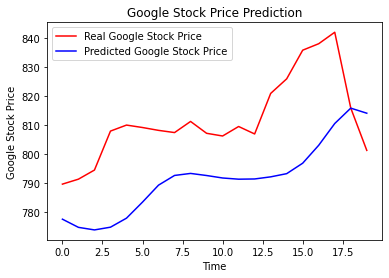

In [96]:
# plotting
real_stock_price = df_test.iloc[:, 1:2].values
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()